In [66]:
import tensorflow as tf

In [67]:
import cv2

In [68]:
import os

In [69]:
import matplotlib.pyplot as plt

In [70]:
import numpy as np

In [71]:
# from google.colab import drive

In [72]:
# drive.mount('/content/gdrive')

In [73]:
img_array = cv2.imread("train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

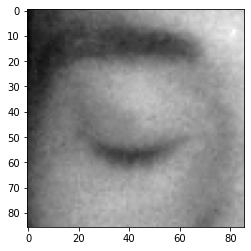

In [74]:
plt.imshow(img_array, cmap = "gray")

In [75]:
img_array.shape

(86, 86)

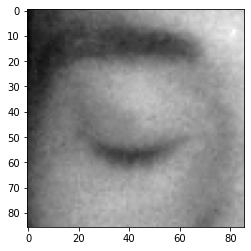

In [76]:
Datadirectory = "train/"
Classes = ["Closed_Eyes","Open_Eyes"]
for category in Classes:
  path = os.path.join(Datadirectory, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

In [77]:
img_size = 224

In [78]:
new_array = cv2.resize(img_array,(img_size,img_size))

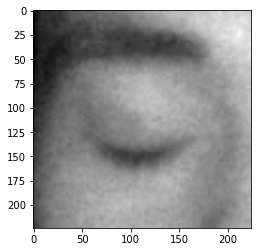

In [79]:
plt.imshow(new_array, cmap = "gray")

In [80]:
training_Data = []

In [81]:
def create_training_Data():
  for category in Classes:
    path = os.path.join(Datadirectory, category)
    class_num = Classes.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        new_array = cv2.resize(img_array,(img_size,img_size))
        training_Data.append([new_array,class_num])
      except Exception as e:
        pass

In [82]:
create_training_Data()

In [83]:
print(len(training_Data))

4000


In [84]:
import random
random.shuffle(training_Data)

In [85]:
x = []
y = []

In [86]:
for features,label in training_Data:
  x.append(features)
  y.append(label)

In [87]:
# Check the dimensions of the original array
# print(x.shape)

# Reshape the array in steps
x = np.array(x).reshape(-1, img_size, img_size, 4)
x = x[:, :, :, :3]
print(x.shape)


(1000, 224, 224, 3)


In [88]:
print(x.shape)

(1000, 224, 224, 3)


In [89]:
x = x/225

In [90]:
y = np.array(y)

In [91]:
import pickle 

pickle_out = open("X.pickle","wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [92]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [93]:
model = tf.keras.applications.mobilenet.MobileNet()

In [94]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [95]:
base_input = model.layers[0].input

In [96]:
base_output = model.layers[-4].output

In [97]:
Falt_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Falt_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [98]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [99]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [100]:
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [101]:
new_model.fit(x, y, epochs=1, validation_split=0.1)

29/29 [==============================] - 36s 1s/step - loss: 1.1286 - accuracy: 0.5033 - val_loss: 1.1582 - val_accuracy: 0.4600


In [102]:
new_model.save('my_model.h5')

In [103]:
new_model = tf.keras.models.load_model('my_model.h5')

In [104]:
img_array = cv2.imread("train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

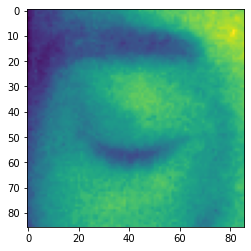

In [105]:
plt.imshow(img_array)

In [106]:
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size,img_size))

In [107]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [108]:
X_input.shape

(1, 224, 224, 3)

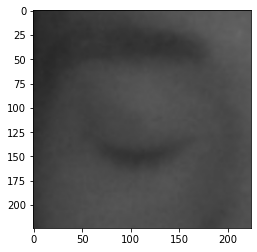

In [109]:
plt.imshow(new_array)

In [110]:
X_input = X_input/255.0

In [111]:
prediction = new_model.predict(X_input)

1/1 [==============================] - 0s 449ms/step


In [112]:
prediction

array([[0.55677724]], dtype=float32)

In [113]:
img = cv2.imread('AS.jpg')

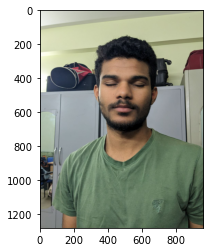

In [114]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [115]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [116]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [117]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [118]:
eyes = eye_cascade.detectMultiScale(gray, 1.1,4)

In [119]:
print(gray.shape)

(1280, 960)


In [120]:
print(type(eye_cascade))

<class 'cv2.CascadeClassifier'>


In [121]:
for(x,y,w,h) in eyes:
  cv2.rectangle(img,(x,y), (x+w, y+h), (0,255,0), 2)

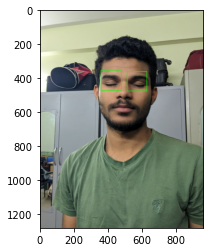

In [122]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [123]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
  roi_gray = gray[y:y+h , x:x+w]
  roi_color = img[y:y+h , x:x+w]
  eyess = eye_cascade.detectMultiScale(roi_gray)
  if len(eyess) == 0:
    print("eyes not detected")
  else:
    for (ex,ey,ew,eh) in eyess:
      eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]

eyes not detected


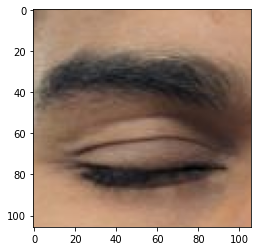

In [124]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [125]:
eyes_roi.shape

(106, 106, 3)

In [126]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image,axis =0)
final_image = final_image/255.0

In [127]:
final_image.shape

(1, 224, 224, 3)

In [128]:
new_model.predict(final_image)

1/1 [==============================] - 0s 44ms/step


array([[0.47591937]], dtype=float32)

In [ ]:
import cv2

path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("NO CAM")

while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    for x, y, w, h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes not detected")
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

        final_image = cv2.resize(eyes_roi, (224, 224))
        final_image = np.expand_dims(final_image, axis=0)
        final_image = final_image/255.0

        Predictions = new_model.predict(final_image)
        if (Predictions > 0):
            status = "Open Eyes"
        else:
            status = "Closed Eyes"

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    font = cv2.FONT_HERSHEY_SIMPLEX

    cv2.putText(frame, status, (50, 50), font, 1, (0, 0, 255), 2, cv2.LINE_4)

    cv2.imshow('Driver Drowsiness Detection', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


eyes not detected
1/1 [==============================] - 0s 52ms/step
eyes not detected
1/1 [==============================] - 0s 53ms/step
eyes not detected
1/1 [==============================] - 0s 64ms/step
eyes not detected
1/1 [==============================] - 0s 52ms/step
False
1/1 [==============================] - 0s 50ms/step
eyes not detected
1/1 [==============================] - 0s 74ms/step
False
1/1 [==============================] - 0s 52ms/step
eyes not detected
1/1 [==============================] - 0s 76ms/step
False
1/1 [==============================] - 0s 50ms/step
False
1/1 [==============================] - 0s 42ms/step
eyes not detected
1/1 [==============================] - 0s 49ms/step
False
1/1 [==============================] - 0s 50ms/step
eyes not detected
1/1 [==============================] - 0s 67ms/step
False
1/1 [==============================] - 0s 48ms/step
eyes not detected
1/1 [==============================] - 0s 45ms/step
False
eyes not detecte

1/1 [==============================] - 0s 44ms/step
False
eyes not detected
1/1 [==============================] - 0s 42ms/step
False
1/1 [==============================] - 0s 35ms/step
False
1/1 [==============================] - 0s 44ms/step
False
eyes not detected
1/1 [==============================] - 0s 35ms/step
False
1/1 [==============================] - 0s 37ms/step
False
eyes not detected
1/1 [==============================] - 0s 34ms/step
False
eyes not detected
1/1 [==============================] - 0s 37ms/step
False
1/1 [==============================] - 0s 37ms/step
eyes not detected
1/1 [==============================] - 0s 45ms/step
False
1/1 [==============================] - 0s 44ms/step
False
eyes not detected
1/1 [==============================] - 0s 44ms/step
False
eyes not detected
1/1 [==============================] - 0s 43ms/step
False
eyes not detected
1/1 [==============================] - 0s 41ms/step
False
eyes not detected
1/1 [===========================

1/1 [==============================] - 0s 45ms/step
False
eyes not detected
1/1 [==============================] - 0s 45ms/step
eyes not detected
1/1 [==============================] - 0s 45ms/step
False
eyes not detected
1/1 [==============================] - 0s 43ms/step
False
False
eyes not detected
1/1 [==============================] - 0s 38ms/step
eyes not detected
1/1 [==============================] - 0s 40ms/step
False
eyes not detected
1/1 [==============================] - 0s 42ms/step
False
False
False
False
False
eyes not detected
1/1 [==============================] - 0s 36ms/step
eyes not detected
1/1 [==============================] - 0s 42ms/step
False
False
eyes not detected
1/1 [==============================] - 0s 37ms/step
False
False
eyes not detected
1/1 [==============================] - 0s 33ms/step
eyes not detected
1/1 [==============================] - 0s 44ms/step
False
False
False
False
False
False
False
False
False
eyes not detected
1/1 [=================

1/1 [==============================] - 0s 51ms/step
eyes not detected
1/1 [==============================] - 0s 53ms/step
False
False
False
False
False
eyes not detected
1/1 [==============================] - 0s 41ms/step
eyes not detected
1/1 [==============================] - 0s 41ms/step
eyes not detected
1/1 [==============================] - 0s 43ms/step
eyes not detected
1/1 [==============================] - 0s 43ms/step
eyes not detected
1/1 [==============================] - 0s 46ms/step
False
eyes not detected
1/1 [==============================] - 0s 40ms/step
eyes not detected
1/1 [==============================] - 0s 43ms/step
False
False
False
eyes not detected
1/1 [==============================] - 0s 43ms/step
eyes not detected
1/1 [==============================] - 0s 41ms/step
False
False
False
False
False
False
False
False
False
False
False
False
eyes not detected
1/1 [==============================] - 0s 39ms/step
eyes not detected
1/1 [=============================

1/1 [==============================] - 0s 43ms/step
False
False
False
False
False
False
False
False
False
False
False
False
False
eyes not detected
1/1 [==============================] - 0s 40ms/step
False
False
False
False
False
False
False
False
False
eyes not detected
1/1 [==============================] - 0s 39ms/step
False
False
False
False
False
False
False
False
False
False
False
False
eyes not detected
1/1 [==============================] - 0s 44ms/step
False
False
False
False
False
False
eyes not detected
1/1 [==============================] - 0s 49ms/step
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
eyes not detected
1/1 [==============================] - 0s 44ms/step
eyes not detected
1/1 [==============================] - 0s 48ms/step
False
False
eyes not detected
1/1 [==============================] - 0s 48ms/step
False
eyes not detected
1/1 [===============

1/1 [==============================] - 0s 35ms/step
False
eyes not detected
1/1 [==============================] - 0s 43ms/step
False
1/1 [==============================] - 0s 41ms/step
False
eyes not detected
1/1 [==============================] - 0s 37ms/step
False
1/1 [==============================] - 0s 43ms/step
False
1/1 [==============================] - 0s 41ms/step
eyes not detected
1/1 [==============================] - 0s 44ms/step
False
1/1 [==============================] - 0s 44ms/step
eyes not detected
1/1 [==============================] - 0s 43ms/step
False
1/1 [==============================] - 0s 36ms/step
eyes not detected
1/1 [==============================] - 0s 42ms/step
False
eyes not detected
1/1 [==============================] - 0s 36ms/step
False
1/1 [==============================] - 0s 33ms/step
eyes not detected
1/1 [==============================] - 0s 47ms/step
False
1/1 [==============================] - 0s 36ms/step
False
1/1 [=======================

False
eyes not detected
1/1 [==============================] - 0s 43ms/step
False
False
False
False
False
False
False
False
eyes not detected
1/1 [==============================] - 0s 37ms/step
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
eyes not detected
1/1 [==============================] - 0s 43ms/step
False
eyes not detected
1/1 [==============================] - 0s 42ms/step
False
False
eyes not detected
1/1 [==============================] - 0s 50ms/step
eyes not detected
1/1 [==============================] - 0s 52ms/step
False
False
1/1 [==============================] - 0s 44ms/step
eyes not detected
1/1 [==============================] - 0s 51ms/step
False
False
eyes not detected
1/1 [==============================] - 0s 43ms/step
False
False
1/1 [==============================] - 0s 50ms/step
False
eyes not detected
1/1 [==============================] - 0s 45ms/step
False
eyes not detected
1/1 [=========

In [130]:
import winsound
frequency = 2500
duration = 1000

import numpy as np

import cv2

path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("NO CAM")
    
counter = 0

while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    for x, y, w, h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes not detected")
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    
    for(x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0),2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    final_image = cv2.resize(eyes_roi, (224, 224))
    final_image = np.expand_dims(final_image, axis=0)
    final_image = final_image/255.0
    
    Predictions = new_model.predict(final_image)
    if (Predictions > 0):
        status = "Open Eyes"
        cv2.putText(frame,
                status,
                (150,150),
                font, 3,
                (0,255,0),
                2,
                cv2.LINE_4)
        x1,y1,w1,h1 = 0,0,175,75
        
        cv2.rectangle(frame,(x1,x1),(x1+w1, y1+h1),(0,0,0),-1)
        
        cv2.putText(frame, 'Active', (x1+ int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
    else:
        counter = counter  + 1
        status = "Closed Eyes"
        cv2.putText(frame,
                status,
                (150,150),
                font, 3,
                (0,255,0),
                2,
                cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255), 2)
        if counter>5:
            x1,y1,w1,h1 = 0,0,175,75
        
            cv2.rectangle(frame,(x1,x1),(x1+w1, y1+h1),(0,0,0),-1)
        
            cv2.putText(frame, 'Sleep ALert', (x1+ int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
            winsound.Beep(frequency, duration)
            counter = 0
        
        
        cv2.imshow("Drowsiness Detection", frame)
        
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

eyes not detected
eyes not detected
False
1/1 [==============================] - 0s 96ms/step
eyes not detected
False
1/1 [==============================] - 0s 65ms/step
False
1/1 [==============================] - 0s 49ms/step
False
1/1 [==============================] - 0s 47ms/step
eyes not detected
False
1/1 [==============================] - 0s 44ms/step
False
1/1 [==============================] - 0s 50ms/step
eyes not detected
False
1/1 [==============================] - 0s 46ms/step
False
1/1 [==============================] - 0s 44ms/step
eyes not detected
eyes not detected
False
1/1 [==============================] - 0s 41ms/step
False
1/1 [==============================] - 0s 43ms/step
eyes not detected
False
1/1 [==============================] - 0s 48ms/step
False
1/1 [==============================] - 0s 44ms/step
eyes not detected
False
1/1 [==============================] - 0s 48ms/step
eyes not detected
False
1/1 [==============================] - 0s 43ms/step
False
1/

KeyboardInterrupt: 

In [ ]:
import winsound
frequency = 2500
duration = 1000

import numpy as np

import cv2

path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("NO CAM")
    
counter = 0

while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    for x, y, w, h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes not detected")
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    
    for(x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0),2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    final_image = cv2.resize(eyes_roi, (224, 224))
    final_image = np.expand_dims(final_image, axis=0)
    final_image = final_image/255.0
    
    Predictions = new_model.predict(final_image)
    if (Predictions > 0):
        status = "Open Eyes"
        cv2.putText(frame,
                status,
                (150,150),
                font, 3,
                (0,255,0),
                2,
                cv2.LINE_4)
        x1,y1,w1,h1 = 0,0,175,75
        
        cv2.rectangle(frame,(x1,x1),(x1+w1, y1+h1),(0,0,0),-1)
        
        cv2.putText(frame, 'Active', (x1+ int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
    else:
        counter = counter  + 1
        status = "Closed Eyes"
        cv2.putText(frame,
                status,
                (150,150),
                font, 3,
                (0,255,0),
                2,
                cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255), 2)
        if counter>5:
            x1,y1,w1,h1 = 0,0,175,75
        
            cv2.rectangle(frame,(x1,x1),(x1+w1, y1+h1),(0,0,0),-1)
        
            cv2.putText(frame, 'Sleep Alert!', (x1+ int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            winsound.Beep(frequency, duration)
            counter = 0
        
            cv2.imshow('Drowsiness Detection', frame)

            if cv2.waitKey(2) & 0xFF == ord('q'):
                break
            
cap.release()
cv2.destroyAllWindows()         

In [ ]:
import winsound
import numpy as np
import cv2

def detect_eyes(frame, eye_cascade):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    for x, y, w, h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes not detected")
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]
    return eyes_roi

def detect_faces(frame, face_cascade, eyes_roi, model):
    font = cv2.FONT_HERSHEY_SIMPLEX
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        if eyes_roi is not None:
            final_image = cv2.resize(eyes_roi, (224, 224))
            final_image = np.expand_dims(final_image, axis=0)
            final_image = final_image/255.0
            predictions = model.predict(final_image)
            if predictions > 0:
                status = "Open Eyes"
                cv2.putText(frame, status, (150,150), font, 3, (0,255,0), 2, cv2.LINE_4)
                x1,y1,w1,h1 = 0,0,175,75
                cv2.rectangle(frame,(x1,x1),(x1+w1, y1+h1),(0,0,0),-1)
                cv2.putText(frame, 'Active', (x1+ int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
            else:
                status = "Closed Eyes"
                cv2.putText(frame, status, (150,150), font, 3, (0,255,0), 2, cv2.LINE_4)
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255), 2)
                counter += 1
                if counter>5:
                    x1,y1,w1,h1 = 0,0,175,75
        
                    cv2.rectangle(frame,(x1,x1),(x1+w1, y1+h1),(0,0,0),-1)
        
                    cv2.putText(frame, 'Sleep Alert!', (x1+ int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
                    winsound.Beep(frequency, duration)
                    counter = 0
        
                    cv2.imshow('Drowsiness Detection', frame)

                    if cv2.waitKey(2) & 0xFF == ord('q'):
                        break
            
cap.release()
cv2.destroyAllWindows()     